## **Data Preprocessing of Satelite Imagery**

In [1]:
!pip install patchify

In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
!ls -lah '/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset'

total 32K
drwx------ 4 root root 4.0K May 20 18:57 'Tile 1'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 2'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 3'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 4'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 5'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 6'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 7'
drwx------ 4 root root 4.0K May 20 18:57 'Tile 8'


In [4]:
dataset_root_folder = '/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset'

In [5]:
dataset_name = 'SatDataset'

In [6]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == 'images': # or masks
    images = os.listdir(path)
    # print(images)
    print(path)
    for i, image_name in enumerate(images):
      if (image_name.endswith(".jpg")):# or (".jpg")
        # print(image_name)
        a = True


/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 4/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 1/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 6/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 2/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 7/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 5/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 8/images
/content/drive/MyDrive/Colab_Notebooks/Mini project/Semantic segmentation dataset/SatDataset/Tile 3/images


In [7]:
image_patch_size = 256

In [8]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [9]:
image.shape

(644, 797, 3)

In [10]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [11]:
len(image_patches)

2

In [12]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [13]:
minmaxscaler = MinMaxScaler()

In [14]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)#MinMaxScaler

In [15]:
image_y[0].shape

(256, 256, 3)

In [16]:
print(type(image))

<class 'numpy.ndarray'>


In [17]:
type(Image.fromarray(image))

PIL.Image.Image

In [18]:
image.shape

(644, 797, 3)

In [19]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [20]:

image_dataset = []
mask_dataset = []
image_extension = ""

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [21]:

print(len(image_dataset))
print(len(mask_dataset))

945
945


In [22]:
type(image_dataset[0])

numpy.ndarray

In [23]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

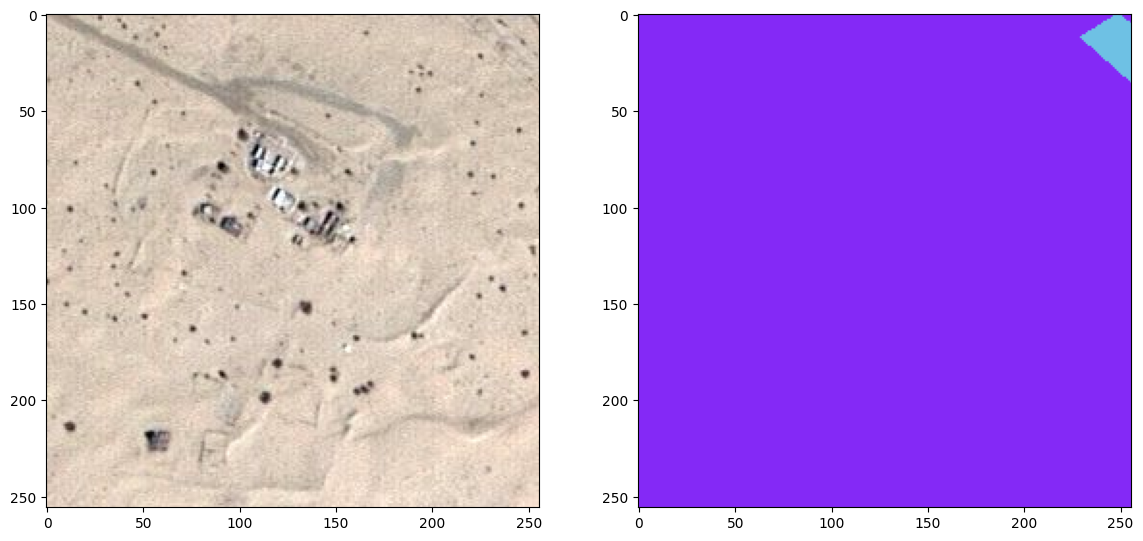

In [24]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [25]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
# converting list to numpy array for further processing ****
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [27]:
mask_dataset.shape[0]

945

In [28]:
label = individual_patched_mask

In [29]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [30]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [31]:
print(len(labels))

945


In [32]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
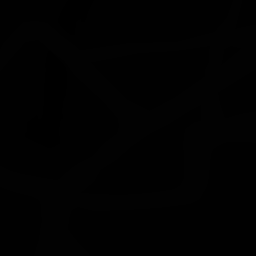

In [33]:
labels[3]

In [34]:
labels = np.expand_dims(labels, axis=3)

In [35]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [36]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [37]:
print("Total No. unique labels of maskses: ",format(np.unique(labels)))

Total No. unique labels of maskses:  [0 1 2 3 4 5]


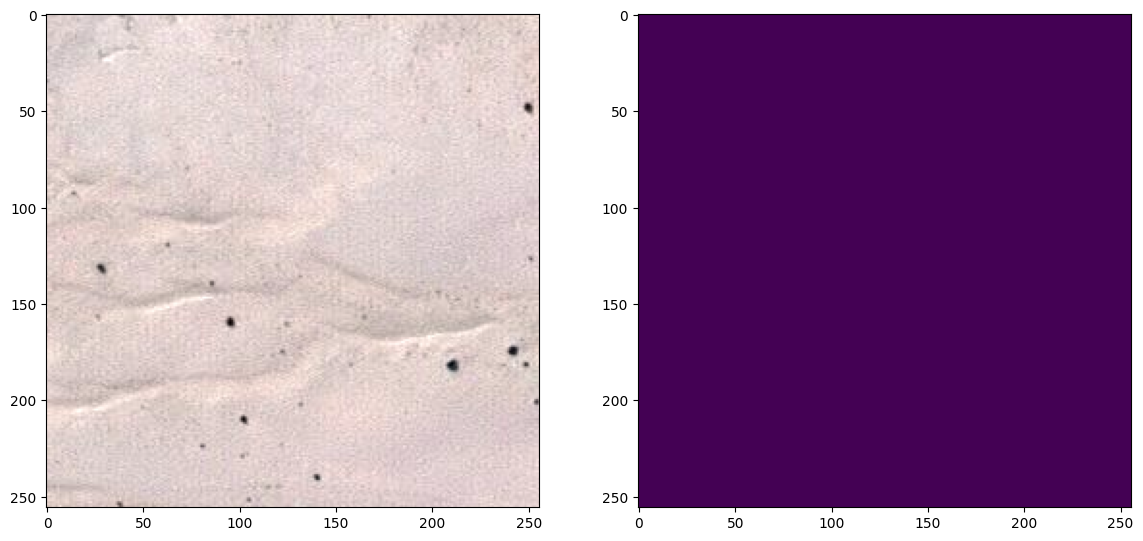

In [38]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
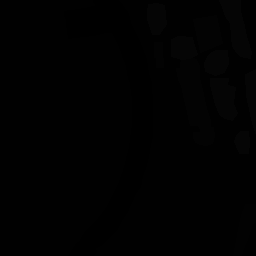

In [39]:
labels[0][:,:,0]

In [40]:
total_classes = len(np.unique(labels))
total_classes

6

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [43]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [44]:
master_trianing_dataset = image_dataset

In [45]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.20, random_state=100)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 256, 256, 3)
(189, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 6)


In [49]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [50]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# **Training and prediction of model on Satellite Imagery Data using deep learning**

In [51]:
!pip install -U segmentation-models

In [52]:
!pip install keras

In [53]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [54]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [55]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [56]:
metrics = ["accuracy", jaccard_coef]

In [57]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [58]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [59]:
model = get_deep_learning_model()

In [60]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

Defining  Loss Function

In [61]:
weights = [0.1655, 0.1655, 0.1655, 0.1655, 0.1655, 0.1655]

In [62]:
import tensorflow as tf
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [63]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [64]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [65]:
total_loss = dice_loss + (1 * focal_loss)

Model Compilation

In [66]:
tf.keras.backend.clear_session()

In [67]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [69]:
# training of model
model_history = model.fit(X_train, y_train,
                          batch_size=5,
                          epochs=50,
                          verbose=1,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/50
152/152 [==============================] - 650s 4s/step - loss: 0.9966 - accuracy: 0.5823 - jaccard_coef: 0.3093 - val_loss: 0.9731 - val_accuracy: 0.6999 - val_jaccard_coef: 0.3913
Epoch 2/50
152/152 [==============================] - 626s 4s/step - loss: 0.9720 - accuracy: 0.7025 - jaccard_coef: 0.4397 - val_loss: 0.9707 - val_accuracy: 0.7069 - val_jaccard_coef: 0.4487
Epoch 3/50
152/152 [==============================] - 608s 4s/step - loss: 0.9636 - accuracy: 0.7378 - jaccard_coef: 0.4825 - val_loss: 0.9620 - val_accuracy: 0.7244 - val_jaccard_coef: 0.4933
Epoch 4/50
152/152 [==============================] - 613s 4s/step - loss: 0.9553 - accuracy: 0.7650 - jaccard_coef: 0.5322 - val_loss: 0.9699 - val_accuracy: 0.7091 - val_jaccard_coef: 0.4741
Epoch 5/50
152/152 [==============================] - 628s 4s/step - loss: 0.9492 - accuracy: 0.7853 - jaccard_coef: 0.5672 - val_loss: 0.9748 - val_accuracy: 0.6836 - val_jaccard_coef: 0.4753
Epoch 6/50
152/152 [===============

In [70]:
history_a = model_history

In [71]:
history_a.history

{'loss': [0.9966307878494263,
  0.9720197319984436,
  0.9635730981826782,
  0.9552731513977051,
  0.949171781539917,
  0.942848265171051,
  0.9400779008865356,
  0.93874591588974,
  0.9365308880805969,
  0.9345258474349976,
  0.9326919317245483,
  0.9303749799728394,
  0.9295979142189026,
  0.9280151724815369,
  0.9275423288345337,
  0.926512598991394,
  0.9257069230079651,
  0.9249106645584106,
  0.9244155287742615,
  0.9234061241149902,
  0.9228050708770752,
  0.922505795955658,
  0.9220607876777649,
  0.9205975532531738,
  0.9205942153930664,
  0.9209865927696228,
  0.9197022914886475,
  0.9188815951347351,
  0.918672502040863,
  0.9184014797210693,
  0.9174914360046387,
  0.9169009327888489,
  0.9162173867225647,
  0.9157341122627258,
  0.9155107140541077,
  0.9148426651954651,
  0.9142891764640808,
  0.9166710376739502,
  0.9163346886634827,
  0.9133775234222412,
  0.9124190807342529,
  0.9116484522819519,
  0.9116319417953491,
  0.9112847447395325,
  0.9106634259223938,
  0.91032

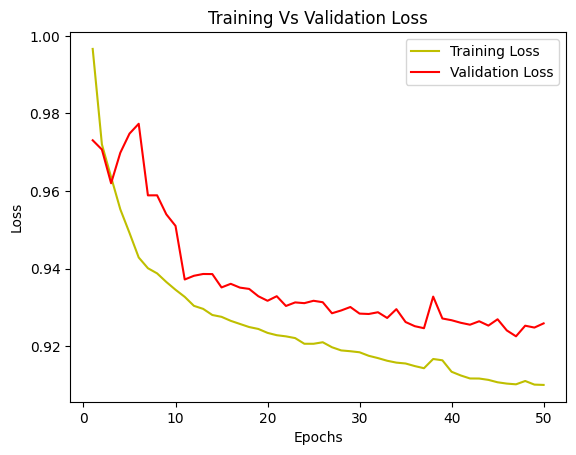

In [72]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

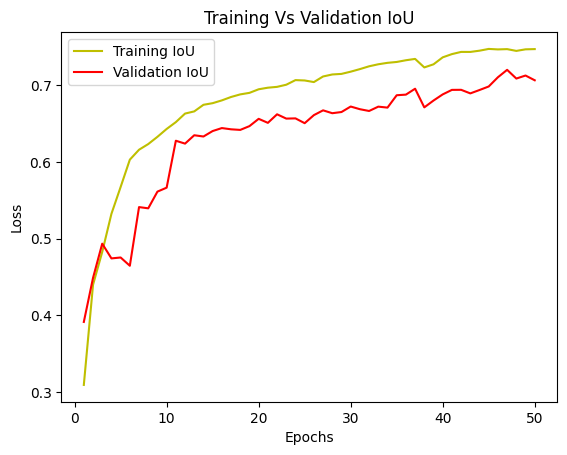

In [73]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [74]:
model_history.params

{'verbose': 1, 'epochs': 50, 'steps': 152}

* predict the model on test data

In [75]:
y_pred = model.predict(X_test)

6/6 [==============================] - 41s 7s/step


In [76]:
len(y_pred)

189

In [77]:
y_pred

array([[[[1.30506409e-02, 5.31056821e-01, 1.74848512e-01,
          7.55681768e-02, 1.97850451e-01, 7.62539916e-03],
         [2.47977697e-03, 6.18052602e-01, 1.12755492e-01,
          4.76698615e-02, 2.17166886e-01, 1.87542185e-03],
         [2.90041394e-03, 5.54228842e-01, 8.10246617e-02,
          4.91398871e-02, 3.11210245e-01, 1.49597262e-03],
         ...,
         [3.15404823e-03, 3.87211502e-01, 6.47843033e-02,
          1.12390831e-01, 4.31140989e-01, 1.31835614e-03],
         [4.09077806e-03, 4.05697495e-01, 7.81983733e-02,
          1.02399625e-01, 4.08098608e-01, 1.51501701e-03],
         [2.16529276e-02, 3.62917125e-01, 1.40745565e-01,
          1.32346779e-01, 3.37323725e-01, 5.01402188e-03]],

        [[2.85778125e-03, 6.71383023e-01, 1.16985336e-01,
          4.38567586e-02, 1.63666844e-01, 1.25019497e-03],
         [3.25847184e-04, 7.62571990e-01, 5.26437163e-02,
          2.06830278e-02, 1.63570389e-01, 2.05100907e-04],
         [4.45109763e-04, 6.02076471e-01, 2.4241

In [78]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [79]:
len(y_pred_argmax)

189

In [80]:
y_pred_argmax

array([[[1, 1, 1, ..., 4, 4, 1],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 4, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 4, 0],
        [0, 0, 0, ..., 0, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[4, 4, 4, ..., 3, 3, 1],
        [4, 4, 4, ..., 3, 3, 3],
        [4, 4, 4, ..., 3, 3, 3],
        ...,
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [81]:
y_test_argmax = np.argmax(y_test, axis=3)

In [82]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 

# Comparing prediction results
  -> with image , labeled mask , predicted mask image

In [83]:
import random

In [84]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 320ms/step


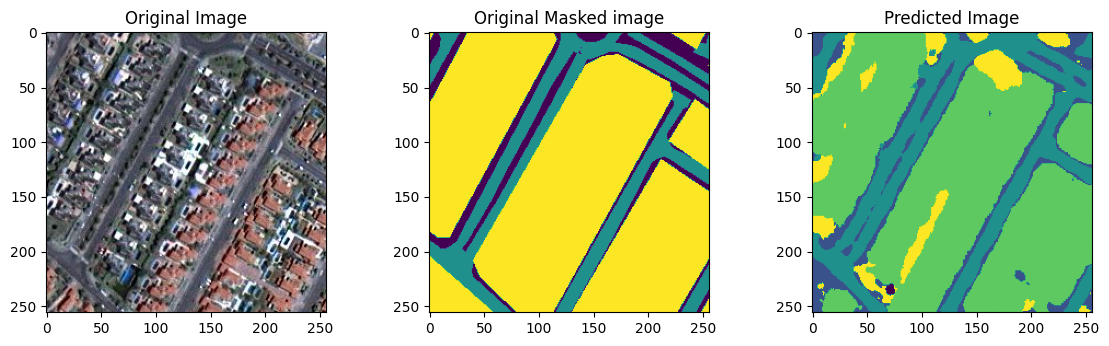

In [85]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [86]:
model.save("Road_Detection_by_SateliteArialView.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K May 24 18:02 .
drwxr-xr-x 1 root root 4.0K May 24 08:24 ..
drwxr-xr-x 4 root root 4.0K May 22 13:22 .config
drwx------ 5 root root 4.0K May 24 08:27 drive
-rw-r--r-- 1 root root  23M May 24 18:02 Road_Detection_by_SateliteArialView.h5
drwxr-xr-x 1 root root 4.0K May 22 13:23 sample_data
